In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

+ Download dữ liệu CIFAR10 sau đó chia thành 2 tập dữ liệu train và validation.
+ Chuẩn hóa dữ liệu với mean = 0.5 và std = 0.5

In [2]:
import torch.utils
import torch.utils.data


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean = (0.5, ), std = (0.5, ))])
trainset = torchvision.datasets.CIFAR10(root='CIFAR10', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1024, num_workers=0, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='CIFAR10', train=True, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1024, num_workers=0, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


+ Hiển thị 5 ảnh đầu tiên trong tập dữ liệu testing

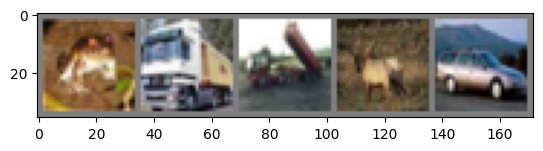

In [3]:
def imshow(img):
    img = img * 0.5 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2,0 )))
    plt.show()

for i, (images, labels) in enumerate(testloader, 0):
  imshow(torchvision.utils.make_grid(images[:5]))
  break

+ Xây dựng model MLP cơ bản để train tập dữ liệu CIFAR10

In [4]:
def getModel(n_features):
  model = nn.Sequential(
      nn.Flatten(),
      nn.Linear(n_features, 256),
      nn.ReLU(),
      nn.Linear(256, 10)
  ).to(device)
  return model



+ Khởi tạo hàm loss function và phương thức optimizer

In [5]:
n_features = 32*32*3
model = getModel(n_features)
lr = 0.01
optim = SGD(params = model.parameters(), lr = lr)
loss_fn = nn.CrossEntropyLoss()
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

+ Xây dựng hàm đánh giá model

In [6]:
def evaluate(model, testloader, criterion):
  model.eval()
  test_loss = 0.0
  correct = 0
  total = 0
  for images, labels in testloader:
      images, labels = images.to(device), labels.to(device)


      outputs = model(images)
      loss = criterion(outputs, labels)
      test_loss += loss.item()

      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  accuracy = 100 * correct / total
  test_loss = test_loss / len(testloader)
  return test_loss, accuracy


+ Bắt đầu training và đánh giá model.

In [ ]:
n_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = [0]
epoch = 0

while (epoch <= n_epochs):
    running_loss = 0.0
    running_correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):

        inputs, labels = inputs.to(device), labels.to(device)

        optim.zero_grad() # khởi tạo giá trị đạo hàm = 0


        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()


        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()

        # 2 dòng dưới đây là lan truyền ngược và optimizer tham số w và b.
        loss.backward()
        optim.step()

    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, loss_fn)
    print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    epoch += 1

Epoch [1/10], Loss: 2.2093, Accuracy: 22.01%, Test Loss: 2.1363, Test Accuracy: 26.70%
Epoch [2/10], Loss: 2.0916, Accuracy: 28.14%, Test Loss: 2.0502, Test Accuracy: 29.64%
Epoch [3/10], Loss: 2.0197, Accuracy: 30.56%, Test Loss: 1.9894, Test Accuracy: 31.55%
Epoch [4/10], Loss: 1.9661, Accuracy: 32.31%, Test Loss: 1.9421, Test Accuracy: 33.07%
Epoch [5/10], Loss: 1.9235, Accuracy: 33.73%, Test Loss: 1.9041, Test Accuracy: 34.39%
Epoch [6/10], Loss: 1.8888, Accuracy: 34.98%, Test Loss: 1.8726, Test Accuracy: 35.49%
Epoch [7/10], Loss: 1.8600, Accuracy: 35.96%, Test Loss: 1.8461, Test Accuracy: 36.36%
Epoch [8/10], Loss: 1.8355, Accuracy: 36.68%, Test Loss: 1.8235, Test Accuracy: 37.09%
Epoch [9/10], Loss: 1.8144, Accuracy: 37.31%, Test Loss: 1.8038, Test Accuracy: 37.76%
Epoch [10/10], Loss: 1.7959, Accuracy: 37.92%, Test Loss: 1.7863, Test Accuracy: 38.33%
Epoch [11/10], Loss: 1.7794, Accuracy: 38.49%, Test Loss: 1.7706, Test Accuracy: 38.70%
Epoch [12/10], Loss: 1.7641, Accuracy: 38

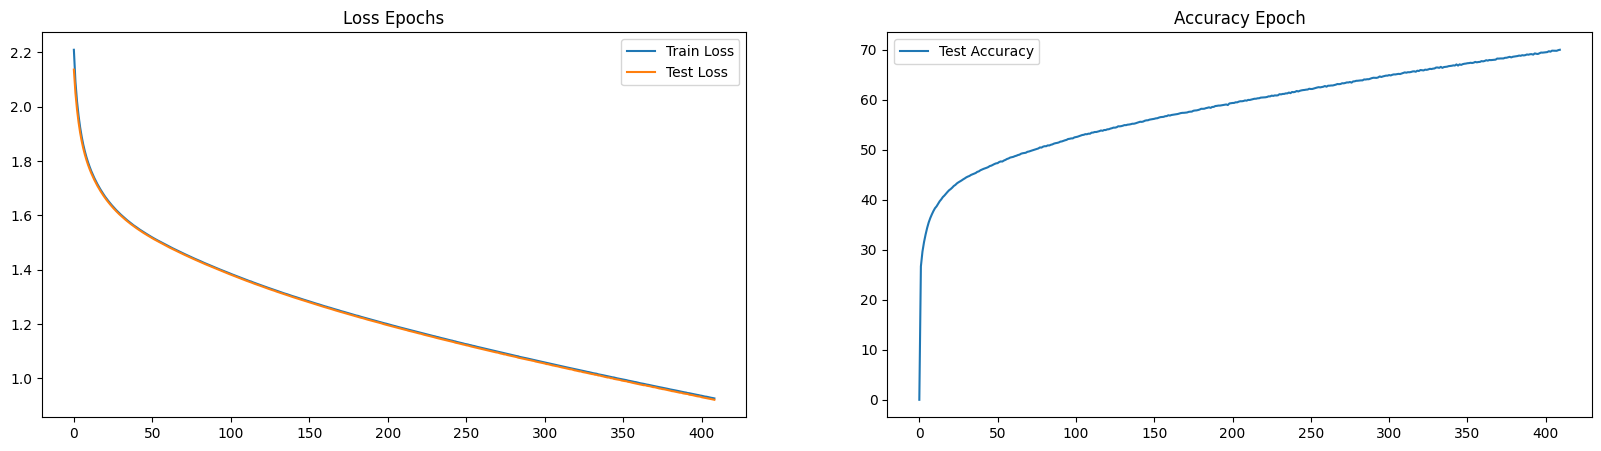

In [8]:
plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.title('Loss Epochs')
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy Epoch')
plt.plot(test_accuracies, label = 'Test Accuracy')
plt.legend()

+ Dưới đây là bài tập về code from scratch

In [9]:
import tensorflow as tf
def zScoreScaling(tensor):
  mean, variance = tf.nn.moments(tensor, axes=[0])
  std_dev = tf.sqrt(variance)

  # Apply z-score scaling
  z_scores = (tensor - mean) / std_dev
  return z_scores

In [10]:
def minMaxScaling(tensor):
  # Min and max values
  tensor_min = tf.reduce_min(tensor, axis=0)
  tensor_max = tf.reduce_max(tensor, axis=0)

  # Min-max scaling
  scaled_tensor = (tensor - tensor_min) / (tensor_max - tensor_min)
  return scaled_tensor

In [11]:
class Linear:
  def __init__(self, input_dim, output_dim):
    self.weight = torch.randn(output_dim, input_dim)
    self.bias = torch.randn(output_dim)

  def forward(self, x):
    return torch.matmul(x, self.weight.T) + self.bias

In [12]:
tensor = torch.tensor([
    [1.0, 2.0, 3.0], 
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0]
])
zscore = zScoreScaling(tensor)
min_max = minMaxScaling(tensor)
print(zscore)
print(min_max)


tf.Tensor(
[[-1.2247448 -1.2247448 -1.2247448]
 [ 0.         0.         0.       ]
 [ 1.2247448  1.2247448  1.2247448]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]], shape=(3, 3), dtype=float32)


In [13]:
tensor = torch.tensor([1.0, 2.0, 3.0])
linear = Linear(3, 2)
out = linear.forward(tensor)
print(out)
print(f"Weight = {linear.weight}")
print(f"Bias = {linear.bias}")

tensor([-2.6763, -5.0570])
Weight = tensor([[-0.3810,  0.7187, -0.6749],
        [-0.5458, -0.4827, -1.0868]])
Bias = tensor([-1.7079, -0.2853])
